In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [6]:
df = pd.read_csv('cleaned_data.csv')

In [7]:
df

,Nepali,English
0,नमस्ते साथीहरू आज हामी भोजपुर जिल्लाको यात्राम...,hello friends today we are embarking on a jour...
1,यो जिल्ला नेपालको प्रदेश नम्बर मा अवस्थित छ र...,this district is located in province no of ne...
2,भोजपुरको प्राकृतिक सौन्दर्यले हामीलाई सुरु देख...,the natural beauty of bhojpur is captivating u...
3,हामीले यहाँको प्रसिद्ध मठ मन्दिरहरूको भ्रमण गर...,we plan to visit some of the famous temples here
4,पहिलो गन्तव्य भोजपुरको पुरानो मठ यहाँको शान्त ...,our first stop an ancient temple in bhojpur th...
...,...,...
1338,मेची रंगशालामा स्थानीय फुटबल खेल हेर्दा भीडको ...,watching a local football match at mechi stadi...
1339,स्वाद र परम्परामा धनी राजबंशी परिकारले तपाईलाई...,the rajbanshi cuisine rich in flavor and tradi...
1340,हरेक परिकार एउटा उत्सवजस्तो लाग्छ,each dish feels like a celebration
1341,झापामा सामुदायिक भावना बलियो छ,the sense of community in jhapa is strong


In [8]:
print("Null Values:\n", df.isnull().sum())

Null Values:
 Nepali     0
English    0
dtype: int64


In [9]:
# Check for duplicates
print("Number of Duplicate Rows:", df.duplicated().sum())

Number of Duplicate Rows: 5


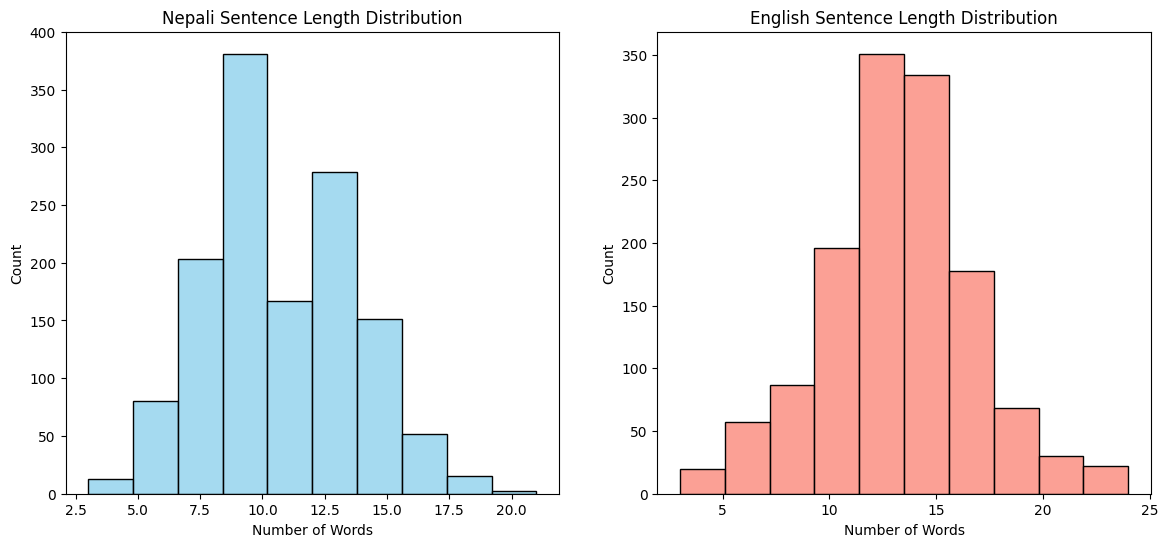

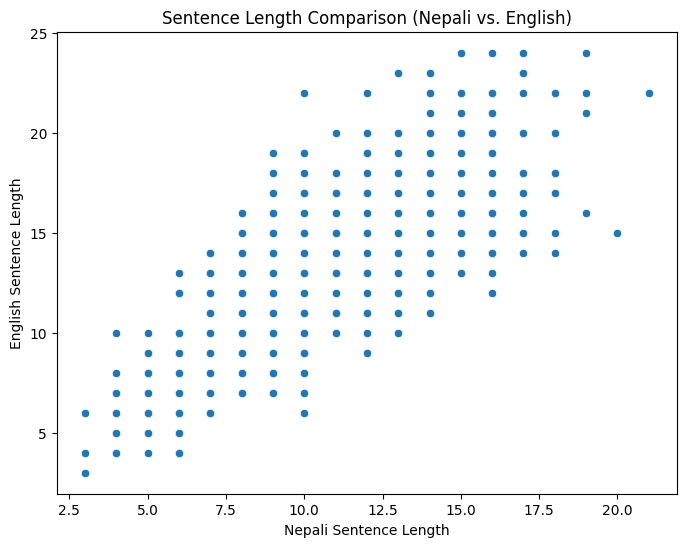

In [10]:
### 2. Text Length Analysis ###
# Calculate sentence length (in words) for both columns
df['nepali_length'] = df['Nepali'].apply(lambda x: len(x.split()))
df['english_length'] = df['English'].apply(lambda x: len(x.split()))

# Plot the distribution of sentence lengths
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['nepali_length'], bins=10, color='skyblue')
plt.title('Nepali Sentence Length Distribution')
plt.xlabel('Number of Words')

plt.subplot(1, 2, 2)
sns.histplot(df['english_length'], bins=10, color='salmon')
plt.title('English Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.show()

# Length comparison scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='nepali_length', y='english_length')
plt.title('Sentence Length Comparison (Nepali vs. English)')
plt.xlabel('Nepali Sentence Length')
plt.ylabel('English Sentence Length')
plt.show()

Unique Nepali Words: 3909
Unique English Words: 2480
Top 10 Common Nepali Words: [('र', 364), ('छ', 240), ('तर', 208), ('छन्', 178), ('देख्दा', 164), ('यो', 131), ('लाग्छ', 124), ('यहाँका', 118), ('हो', 116), ('मलाई', 112)]
Top 10 Common English Words: [('the', 1605), ('of', 721), ('to', 390), ('and', 383), ('in', 331), ('a', 320), ('is', 270), ('with', 236), ('are', 228), ('its', 217)]


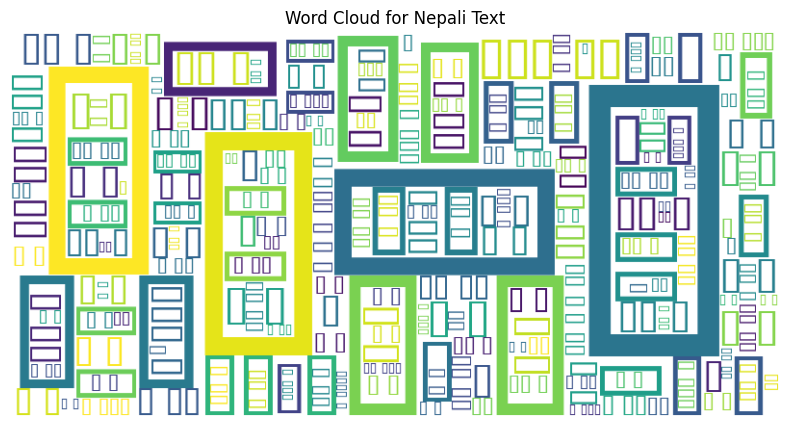

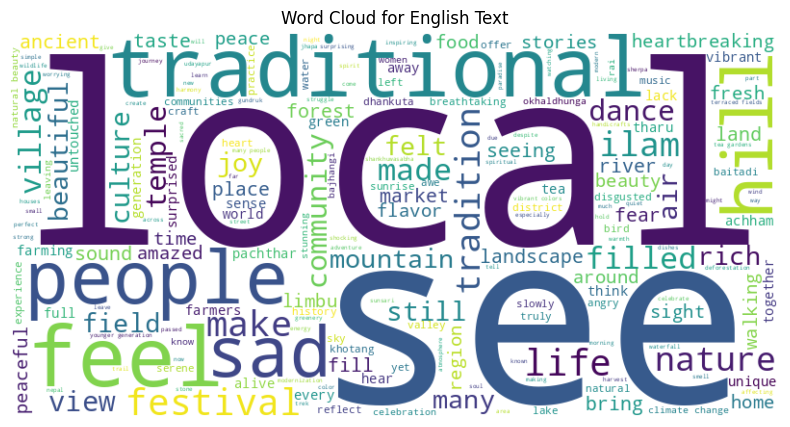

In [15]:
### 3. Tokenization and Vocabulary Size ###
# Tokenize and find unique words in Nepali and English columns
font = '/mnt/45b9faff-45f3-43f2-903f-9b92a9a6338c/major-project/notebooks/mBART/nepali_font.ttf'
nepali_vocab = Counter(" ".join(df['Nepali']).split())
english_vocab = Counter(" ".join(df['English']).split())

print("Unique Nepali Words:", len(nepali_vocab))
print("Unique English Words:", len(english_vocab))

# Display the 10 most common words
print("Top 10 Common Nepali Words:", nepali_vocab.most_common(10))
print("Top 10 Common English Words:", english_vocab.most_common(10))

# Word Cloud for Nepali
plt.figure(figsize=(10, 5))
nepali_wordcloud = WordCloud(width=800, height=400, background_color='white',font_path=font).generate(" ".join(df['Nepali']))
plt.imshow(nepali_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Nepali Text')
plt.show()

# Word Cloud for English
plt.figure(figsize=(10, 5))
english_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['English']))
plt.imshow(english_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for English Text')
plt.show()

Length Ratio Statistics:
 count    1343.000000
mean        0.818253
std         0.157414
min         0.400000
25%         0.711310
50%         0.800000
75%         0.909091
max         1.666667
Name: length_ratio, dtype: float64


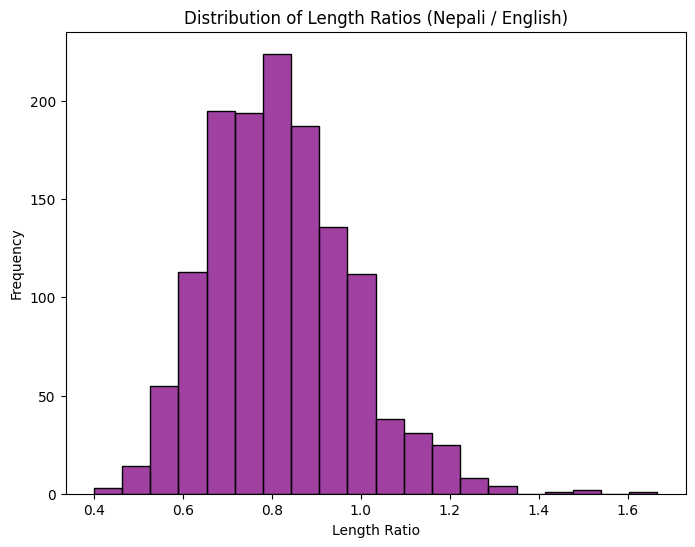

In [12]:
### 4. Sentence Pair Similarity ###
# Calculate the length ratio between Nepali and English sentences
df['length_ratio'] = df['nepali_length'] / df['english_length']
print("Length Ratio Statistics:\n", df['length_ratio'].describe())

# Plot length ratio distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['length_ratio'], bins=20, color='purple')
plt.title('Distribution of Length Ratios (Nepali / English)')
plt.xlabel('Length Ratio')
plt.ylabel('Frequency')
plt.show()



In [13]:
### 5. Language-Specific Checks ###
# Check for non-Nepali characters in the Nepali column
df['nepali_non_nepali_characters'] = df['Nepali'].apply(lambda x: any(char.isdigit() or char in '!@#$%^&*()_+-={}[]:;"\'<>?,./' for char in x))
non_nepali_chars = df[df['nepali_non_nepali_characters']]
print("Sentences with Non-Nepali Characters in Nepali Text:\n", non_nepali_chars)

# Check for numeric values and special characters
print("Special Characters in Nepali Text:", df['Nepali'].apply(lambda x: any(not char.isalnum() for char in x)).sum())
print("Special Characters in English Text:", df['English'].apply(lambda x: any(not char.isalnum() for char in x)).sum())


Sentences with Non-Nepali Characters in Nepali Text:
 Empty DataFrame
Columns: [Nepali, English, nepali_length, english_length, length_ratio, nepali_non_nepali_characters]
Index: []
Special Characters in Nepali Text: 1343
Special Characters in English Text: 1343


In [16]:
def get_unique_characters(text_series):
    # Join all sentences, then convert to a set of characters to get unique ones
    unique_chars = set("".join(text_series))
    return unique_chars

# Get unique characters in Nepali and English columns
nepali_unique_chars = get_unique_characters(df['Nepali'])
english_unique_chars = get_unique_characters(df['English'])

# Display the unique characters and their counts
print("Unique Nepali Characters:", nepali_unique_chars)
print("Count of Unique Nepali Characters:", len(nepali_unique_chars))

print("Unique English Characters:", english_unique_chars)
print("Count of Unique English Characters:", len(english_unique_chars))

# Combine the unique characters from both languages to get total unique characters
total_unique_chars = nepali_unique_chars.union(english_unique_chars)

print("Total Unique Characters (Nepali + English):", total_unique_chars)
print("Count of Total Unique Characters:", len(total_unique_chars))

Unique Nepali Characters: {'त', 'अ', 'च', 'ौ', 'औ', 'श', 'ग', 'ञ', 'न', 'र', 'द', 'ध', 'घ', 'आ', 'ठ', 'इ', 'ी', 'व', 'झ', 'छ', 'ै', 'ि', 'ढ', 'ष', ' ', 'ा', 'ङ', 'ऐ', 'ृ', 'ज', 'थ', 'ड', 'ो', 'ओ', 'ए', 'े', 'ं', 'ऊ', '्', 'ख', 'ण', 'ट', 'फ', 'स', 'ब', 'ह', 'ू', 'ँ', 'प', 'ः', 'ल', 'ई', 'म', 'क', 'य', 'ु', 'उ', 'भ'}
Count of Unique Nepali Characters: 58
Unique English Characters: {'b', 's', 'z', 'y', 'i', 'l', 'e', 'v', ' ', 'm', 'd', 'p', 'g', 'j', 'c', 'w', 'o', 'k', 'r', 'u', 'f', 'a', 'q', 'h', 't', 'n', 'x'}
Count of Unique English Characters: 27
Total Unique Characters (Nepali + English): {'त', 'b', 'च', 'ौ', 'z', 'द', 'l', 'e', 'इ', 'ी', 'झ', 'ै', 'ङ', 'ऐ', 'm', 'd', 'p', 'े', 'g', 'ट', 'w', 'फ', 'u', 'r', 'ब', 'ँ', 'प', 'ः', 'h', 'ल', 'ई', 't', 'म', 'n', 'ं', 'भ', 'अ', 'औ', 'श', 'ग', 'ञ', 's', 'न', 'र', 'y', 'i', 'ध', 'घ', 'आ', 'ठ', 'v', 'व', 'छ', 'ि', 'ढ', 'ष', ' ', 'ा', 'ृ', 'ज', 'थ', 'ड', 'ो', 'ओ', 'ए', 'ऊ', '्', 'ख', 'ण', 'j', 'c', 'k', 'o', 'स', 'f', 'ह', 'ू', 'a', 'q', 'क'

In [17]:
def get_rare_words(text_series, top_n=10):
    # Tokenize all words in the column, flatten into a single list, then count
    words = " ".join(text_series).split()
    word_counts = Counter(words)
    
    # Get the top_n least common words and their frequencies
    rare_words = word_counts.most_common()[:-top_n-1:-1]
    return rare_words

# Get the 10 rarest words and their frequencies in Nepali
nepali_rare_words = get_rare_words(df['Nepali'], top_n=10)
print("Top 10 Most Rare Nepali Words and Frequencies:", nepali_rare_words)

# Get the 10 rarest words and their frequencies in English
english_rare_words = get_rare_words(df['English'], top_n=10)
print("Top 10 Most Rare English Words and Frequencies:", english_rare_words)

Top 10 Most Rare Nepali Words and Frequencies: [('सहयोग', 1), ('उत्सवजस्तो', 1), ('प्रतिस्पर्धाको', 1), ('प्रतिध्वनित', 1), ('तपाईका', 1), ('जयकार', 1), ('भीडको', 1), ('खेल', 1), ('फुटबल', 1), ('रंगशालामा', 1)]
Top 10 Most Rare English Words and Frequencies: [('competition', 1), ('ears', 1), ('crowd', 1), ('cheers', 1), ('stadium', 1), ('match', 1), ('football', 1), ('unstoppable', 1), ('crashing', 1), ('satasidham', 1)]


In [21]:
import stanza

# stanza.download('ne')
stanza.download('en')
# nlp_nepali = stanza.Pipeline('ne')
nlp_english = stanza.Pipeline('en')

2024-10-30 21:12:37 INFO: Downloaded file to /home/kingdom/stanza_resources/resources.json
2024-10-30 21:12:37 INFO: Downloading default packages for language: en (English) ...
2024-10-30 21:13:21 INFO: Downloaded file to /home/kingdom/stanza_resources/en/default.zip
2024-10-30 21:13:34 INFO: Finished downloading models and saved to /home/kingdom/stanza_resources
2024-10-30 21:13:34 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-10-30 21:13:35 INFO: Downloaded file to /home/kingdom/stanza_resources/resources.json
2024-10-30 21:13:38 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_noc

In [22]:
# Function to perform POS tagging and count tag distribution
def get_pos_distribution(text_series, nlp_model):
    all_tags = []
    for text in text_series:
        doc = nlp_model(text)
        for sentence in doc.sentences:
            for word in sentence.words:
                all_tags.append(word.upos)  # Using Universal POS tags
    tag_counts = Counter(all_tags)
    return tag_counts

# POS tagging and distribution for Nepali
# nepali_pos_dist = get_pos_distribution(df['Nepali'], nlp_nepali)
# print("Nepali POS Tag Distribution:", nepali_pos_dist)

# POS tagging and distribution for English
english_pos_dist = get_pos_distribution(df['English'], nlp_english)
print("English POS Tag Distribution:", english_pos_dist)


English POS Tag Distribution: Counter({'NOUN': 5080, 'DET': 2249, 'ADP': 2193, 'ADJ': 2190, 'VERB': 2082, 'PRON': 1096, 'AUX': 918, 'ADV': 764, 'CCONJ': 609, 'PART': 302, 'PROPN': 213, 'SCONJ': 193, 'INTJ': 10, 'NUM': 8, 'X': 4})
